In [1]:
from dbfread import DBF
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import mapclassify
import matplotlib.colors as mcolor
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
%cd /849



D:\849


In [2]:
dbf_file = DBF('FancyYQ/taxi_zones/taxi_zones.dbf')
data = pd.DataFrame(iter(dbf_file))
data

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx
259,260,0.133514,0.000422,Woodside,260,Queens
260,261,0.027120,0.000034,World Trade Center,261,Manhattan
261,262,0.049064,0.000122,Yorkville East,262,Manhattan


In [3]:
# tip-location
df3=pd.read_csv("C.csv")
df3

,DOLocationID,count,average_tip
0,1,14044,11.165057
1,2,5,2.092000
2,3,515,3.013709
3,4,42568,1.486334
4,5,55,10.514182
...,...,...,...
18787,261,17898,4.207986
18788,262,52637,3.317190
18789,263,71146,3.120770
18790,264,19816,3.928479


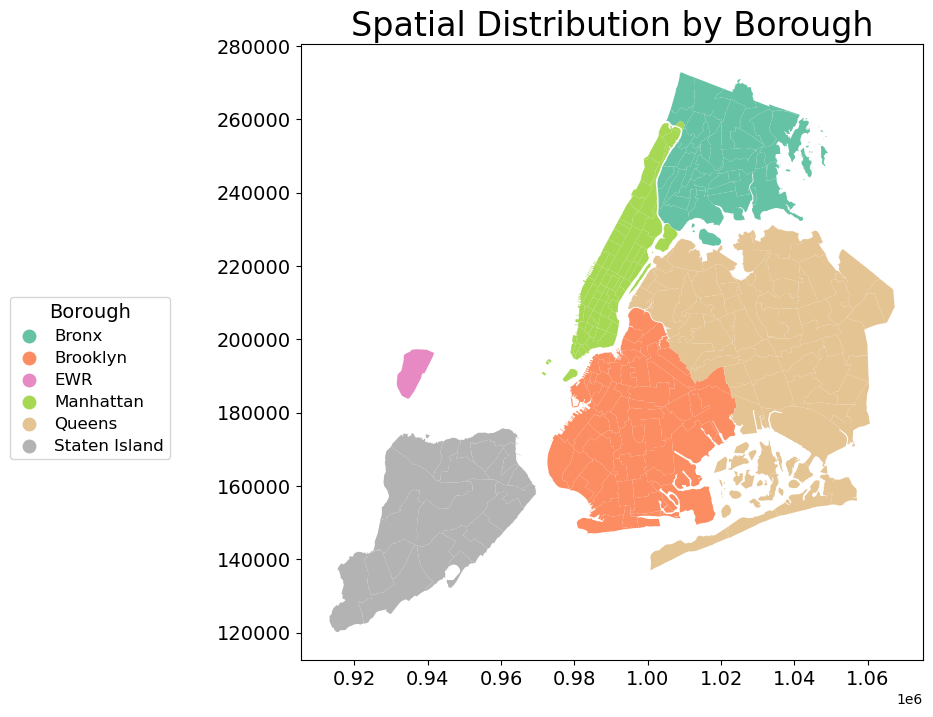

In [14]:
geo = gpd.read_file('FancyJelly/taxi_zones/taxi_zones.shp')

# 创建绘图
fig, ax = plt.subplots(figsize=(10, 8))
geo.plot(column='borough', cmap='Set2', legend=True, ax=ax)

# 移动图例到左上角
legend = ax.get_legend()
legend.set_bbox_to_anchor((-0.2, 0.6))  
legend.set_title("Borough", prop={'size': 14})  
for text in legend.get_texts():
    text.set_fontsize(12)  # 图例内容字体大小

# 设置标题和坐标轴字体大小
plt.title('Spatial Distribution by Borough', fontsize=24)  # 增大标题字体大小
ax.tick_params(axis='both', labelsize=14)  # 增大坐标轴字体大小

plt.show()

In [17]:
df18=pd.read_csv("pickup_counts18.csv")
df19=pd.read_csv("pickup_counts19.csv")
df20=pd.read_csv("pickup_counts20.csv")
df21=pd.read_csv("pickup_counts21.csv")
df22=pd.read_csv("pickup_counts22.csv")
df23=pd.read_csv("pickup_counts23.csv")

In [18]:
# 1. 定义文件路径模板
file_pattern = "location_data/location_data/*_dropoff_counts.csv"

# 2. 获取所有文件路径
file_list = sorted(glob.glob(file_pattern))

# 3. 读取并合并所有文件
dataframes = []
for file in file_list:
    df = pd.read_csv(file)
    dataframes.append(df)

# merge
merged_data = pd.concat(dataframes, ignore_index=True)

merged_data.to_csv("merged_dropoff_counts.csv", index=False)

merged_df2=pd.read_csv("merged_dropoff_counts.csv")
merged_df2

,DOLocationID,count
0,236,360459
1,161,337453
2,237,320277
3,170,279155
4,230,270526
...,...,...
18787,44,15
18788,59,14
18789,204,12
18790,2,8


In [19]:
# 读取所有文件路径
file_paths = glob.glob("2018-*_dropoff_counts_tip.csv") + glob.glob("2019-*_dropoff_counts_tip.csv") + \
             glob.glob("2020-*_dropoff_counts_tip.csv") + glob.glob("2021-*_dropoff_counts_tip.csv") + \
             glob.glob("2022-*_dropoff_counts_tip.csv") + glob.glob("2023-*_dropoff_counts_tip.csv")

# 创建一个空列表用于存储数据
data_list = []

# 遍历所有文件路径
for file_path in file_paths:
    # 读取数据
    df = pd.read_csv(file_path)
    
    # 提取年份信息（假设文件名格式固定）
    year = file_path.split('-')[0]
    
    # 添加年份列
    df['Year'] = int(year)
    
    # 追加到列表
    data_list.append(df)

# 将所有数据合并为一个 DataFrame
combined_df = pd.concat(data_list, ignore_index=True)

# 确保列名一致
combined_df.rename(columns={combined_df.columns[0]: "DOLocationID", combined_df.columns[1]: "average_tip"}, inplace=True)

# 按年份和 DOLocationID 分组，统计每年的平均小费
yearly_avg_tips = combined_df.groupby(['Year', 'DOLocationID'])['average_tip'].mean().reset_index()

# 将每一年的数据分开保存为单独的文件
for year in range(2018, 2024):
    yearly_data = yearly_avg_tips[yearly_avg_tips['Year'] == year]
    yearly_data.to_csv(f"average_tips_{year}.csv", index=False)
    print(f"Saved: average_tips_{year}.csv")



Saved: average_tips_2018.csv
Saved: average_tips_2019.csv
Saved: average_tips_2020.csv
Saved: average_tips_2021.csv
Saved: average_tips_2022.csv
Saved: average_tips_2023.csv


In [20]:
df2018=pd.read_csv("average_tips_2018.csv")
df2019=pd.read_csv("average_tips_2019.csv")
df2020=pd.read_csv("average_tips_2020.csv")
df2021=pd.read_csv("average_tips_2021.csv")
df2022=pd.read_csv("average_tips_2022.csv")
df2023=pd.read_csv("average_tips_2023.csv")

In [21]:
df2023

,Year,DOLocationID,average_tip,average_tip.1
0,2023,1,9808.000000,14.896871
1,2023,2,7.090909,2.808994
2,2023,3,261.666667,3.590170
3,2023,4,12224.083333,3.091836
4,2023,5,44.833333,6.185740
...,...,...,...,...
257,2023,261,15359.000000,4.450784
258,2023,262,48425.083333,3.371419
259,2023,263,65181.916667,3.149147
260,2023,264,32228.083333,3.544607


In [22]:
dfs = [df18,df19, df20, df21, df22, df23]
merged_df = pd.concat(dfs, ignore_index=True)
merged_df

,PULocationID,Count
0,1,7856.0
1,2,73.0
2,3,1343.0
3,4,213345.0
4,5,NaN
...,...,...
1572,261,198639.0
1573,262,511237.0
1574,263,726577.0
1575,264,356729.0


In [23]:
# Pick-up and drop-off
df=merged_df
df2=merged_df2
pickup_counts= df.groupby('PULocationID')['Count'].sum()
dropoff_counts = df2.groupby('DOLocationID')['count'].sum()
average_tip=df3.groupby('DOLocationID')['average_tip'].mean()
average_tip2018=df2018.groupby('DOLocationID')['average_tip.1'].mean()
average_tip2019=df2019.groupby('DOLocationID')['average_tip.1'].mean()
average_tip2020=df2020.groupby('DOLocationID')['average_tip.1'].mean()
average_tip2021=df2021.groupby('DOLocationID')['average_tip.1'].mean()
average_tip2022=df2022.groupby('DOLocationID')['average_tip.1'].mean()
average_tip2023=df2023.groupby('DOLocationID')['average_tip.1'].mean()

# add to geo
geo['pickup_count'] = geo['LocationID'].map(pickup_counts).fillna(0)
geo['dropoff_count'] = geo['LocationID'].map(dropoff_counts).fillna(0)
geo['average_tip'] = geo['LocationID'].map(average_tip).fillna(0)
geo['2018average_tip'] = geo['LocationID'].map(average_tip2018).fillna(0)
geo['2019average_tip'] = geo['LocationID'].map(average_tip2019).fillna(0)
geo['2020average_tip'] = geo['LocationID'].map(average_tip2020).fillna(0)
geo['2021average_tip'] = geo['LocationID'].map(average_tip2021).fillna(0)
geo['2022average_tip'] = geo['LocationID'].map(average_tip2022).fillna(0)
geo['2023average_tip'] = geo['LocationID'].map(average_tip2023).fillna(0)

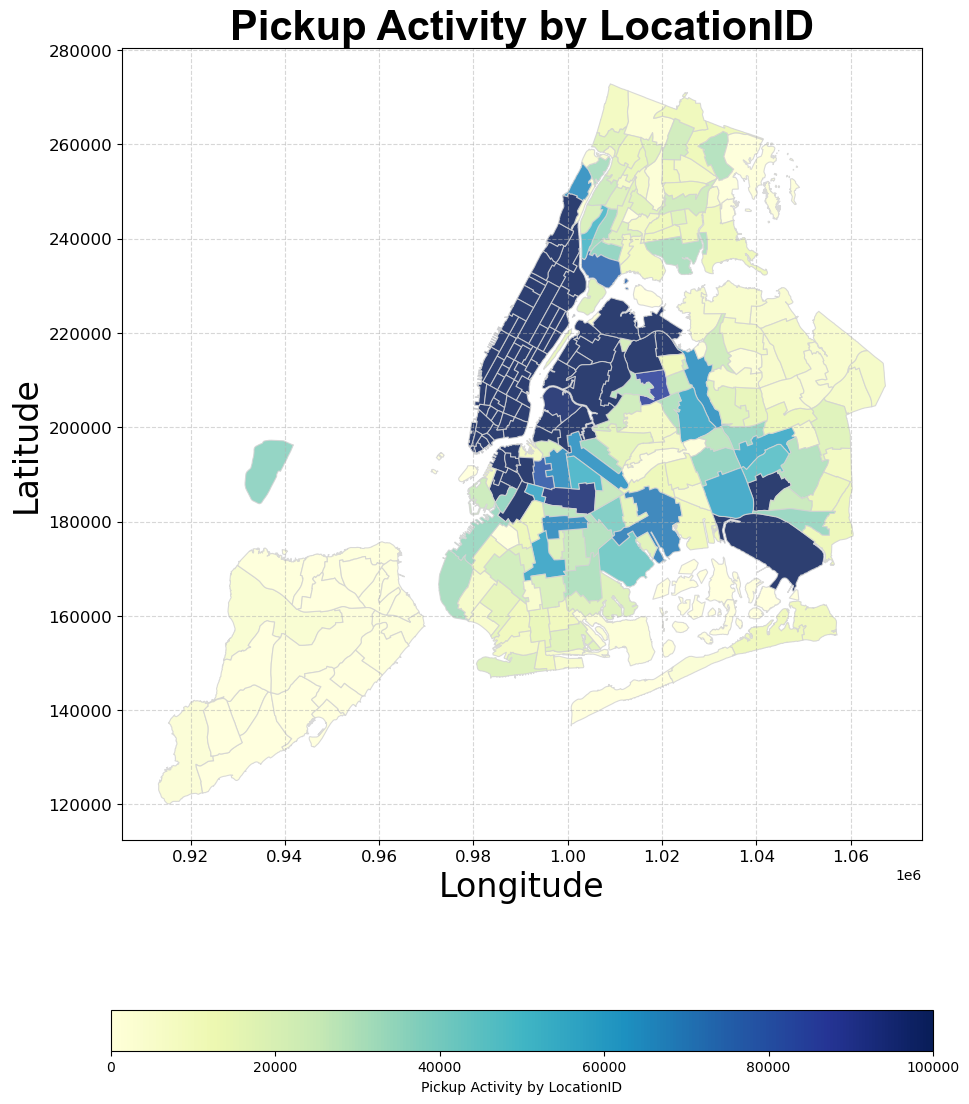

In [26]:
# Create a figure and axis with custom size
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plot the GeoDataFrame with improved contrast and visible boundaries
geo.plot(column='pickup_count', ax=ax, legend=True,
         legend_kwds={'label': "Pickup Activity by LocationID", 
                      'orientation': "horizontal", 'shrink': 0.6},
         cmap='YlGnBu', alpha=0.85, edgecolor='lightgray', linewidth=0.8,
         vmin=0, vmax=100000)

# Title and axis label adjustments
ax.set_title('Pickup Activity by LocationID', fontsize=30, fontweight='bold', family='Arial')
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize=24)

# Customize ticks and grid
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


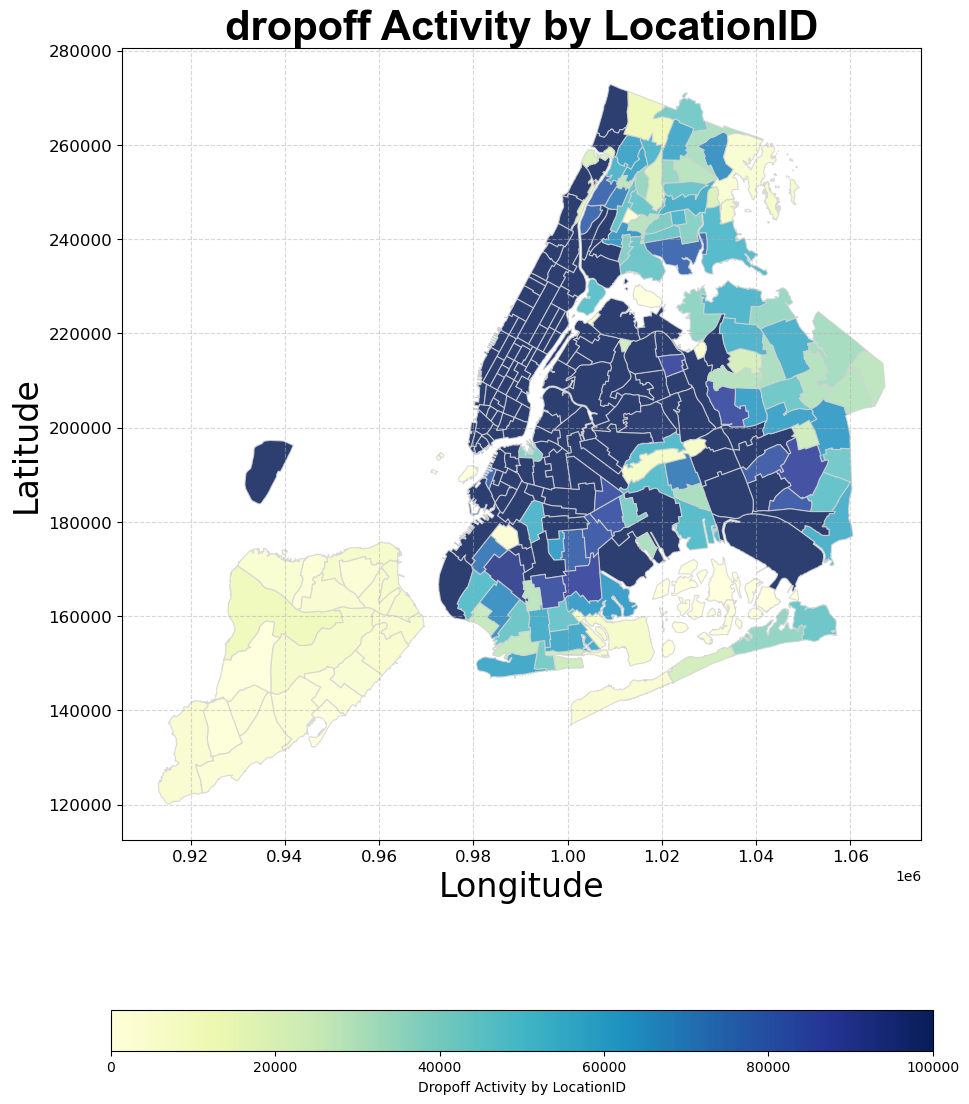

In [27]:
# Create a figure and axis with custom size
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plot the GeoDataFrame with improved contrast and visible boundaries
geo.plot(column='dropoff_count', ax=ax, legend=True,
         legend_kwds={'label': "Dropoff Activity by LocationID", 
                      'orientation': "horizontal", 'shrink': 0.6},
         cmap='YlGnBu', alpha=0.85, edgecolor='lightgray', linewidth=0.8,
         vmin=0, vmax=100000)

# Title and axis label adjustments
ax.set_title('dropoff Activity by LocationID', fontsize=30, fontweight='bold', family='Arial')
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize=24)

# Customize ticks and grid
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


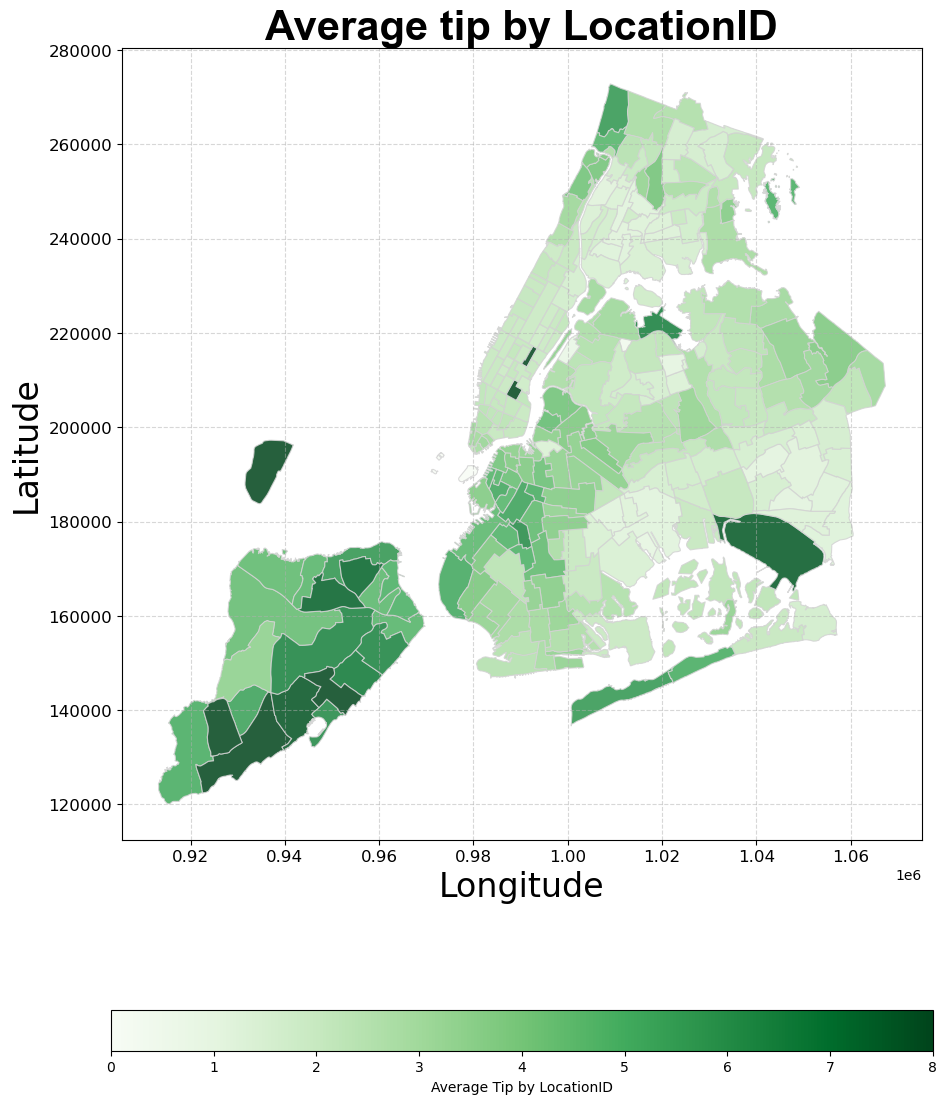

In [28]:
# Create a figure and axis with custom size
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plot the GeoDataFrame with improved contrast and visible boundaries
geo.plot(
    column='average_tip',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Average Tip by LocationID",
        'orientation': "horizontal",
        'shrink': 0.6
    },
    cmap='Greens',  
    alpha=0.85,  
    edgecolor='lightgray',  
    linewidth=0.8,  
    vmin=0,  
    vmax=8   
)


# Title and axis label adjustments
ax.set_title('Average tip by LocationID', fontsize=30, fontweight='bold', family='Arial')
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize=24)

# Customize ticks and grid
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


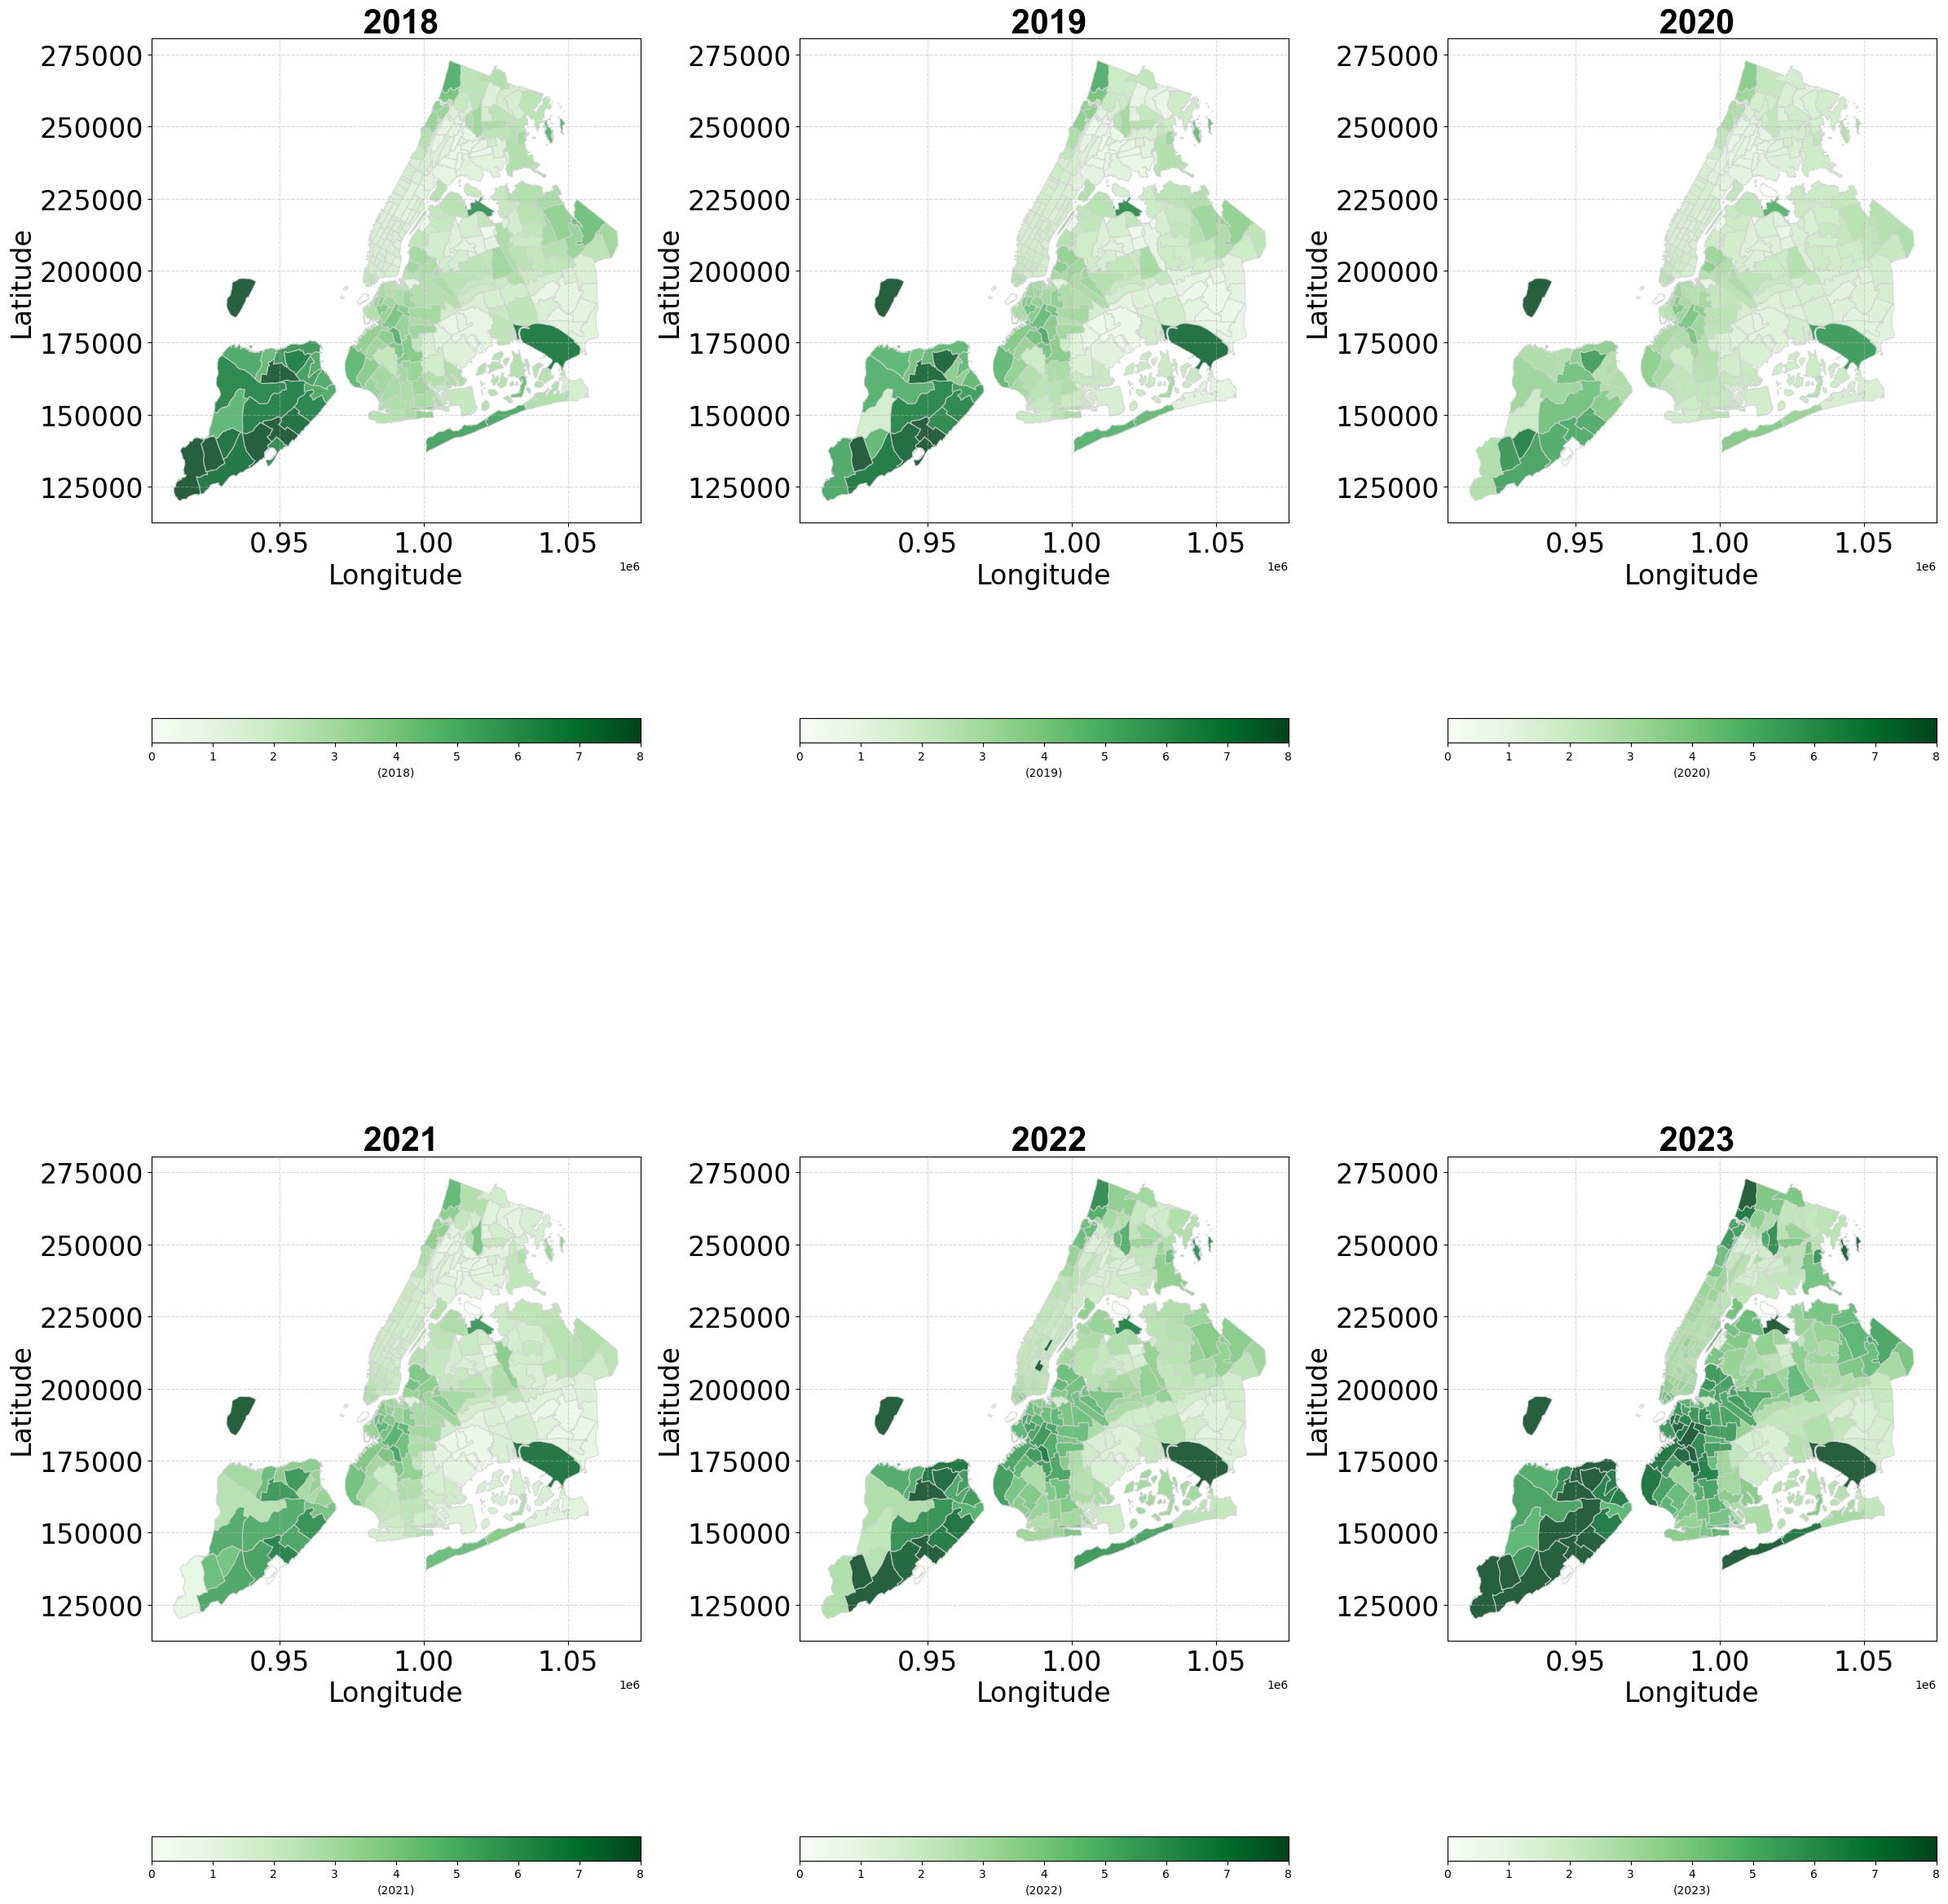

In [35]:
# 定义年份列表
years = [2018, 2019, 2020, 2021, 2022, 2023]

# 创建一个图表容器，3行2列的子图
fig, axes = plt.subplots(2, 3, figsize=(24, 30))  # 图表尺寸适当调大以避免重叠

# 循环绘制每年的数据
for i, year in enumerate(years):
    row, col = divmod(i, 3)  # 计算子图的行列索引
    ax = axes[row, col]
    
    geo.plot(
        column=f'{year}average_tip',  # 动态替换年份
        ax=ax,
        legend=True,
        legend_kwds={
            'label': f"({year})",
            'orientation': "horizontal",
            'shrink': 1
        },
        cmap='Greens',  
        alpha=0.85,  
        edgecolor='lightgray',  
        linewidth=0.8,  
        vmin=0,  
        vmax=8
    )
    
    # 设置标题和轴标签
    ax.set_title(f' {year}', fontsize=30, fontweight='bold', family='Arial')
    ax.set_xlabel('Longitude', fontsize=24)
    ax.set_ylabel('Latitude', fontsize=24)
    
    # 自定义刻度和网格
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.grid(True, linestyle='--', alpha=0.5)

# 调整布局
plt.tight_layout()
plt.show()

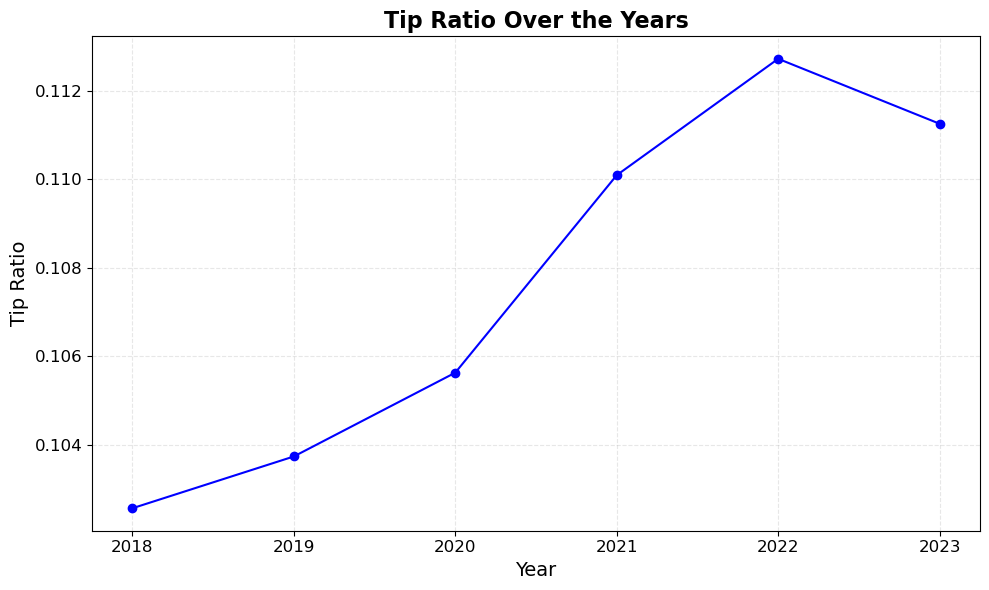

In [43]:
df_summary=pd.read_csv("yearly_summary.csv")
# Add new column for the ratio of Total_Tip_Amount to (Total_Tip_Amount + Total_Tip_Amount)
df_summary['Tip_Ratio'] = df_summary['Total_Tip_Amount'] / (df_summary['Total_Tip_Amount'] + df_summary['Total_Amount'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_summary['Year'], df_summary['Tip_Ratio'], marker='o', linestyle='-', color='blue')
plt.title('Tip Ratio Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Tip Ratio', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(df_summary['Year'], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

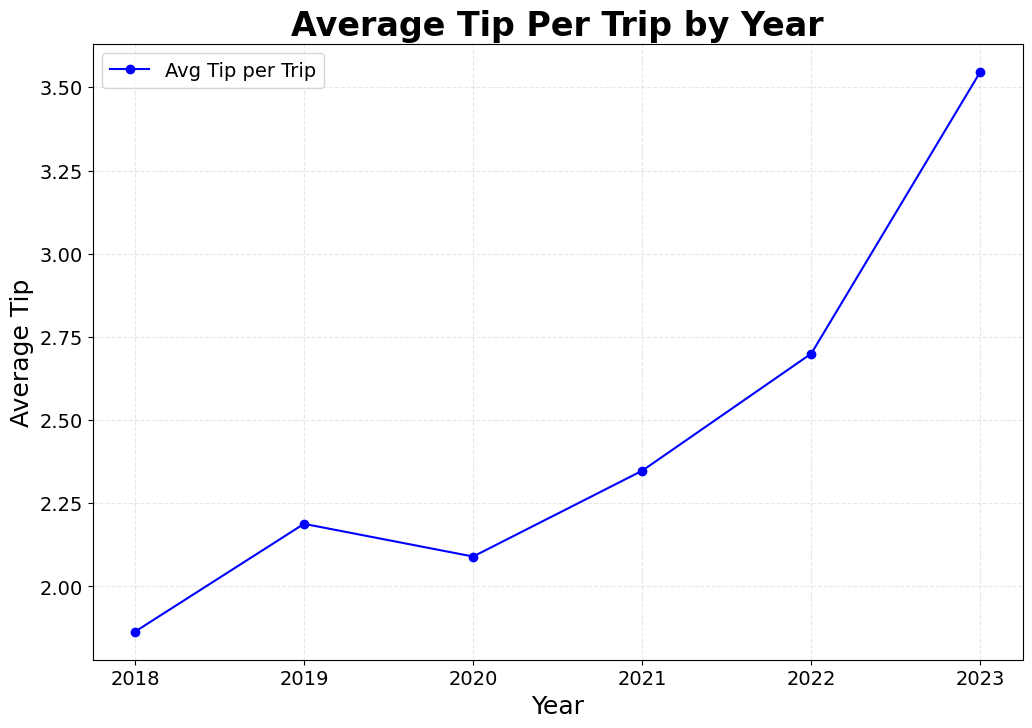

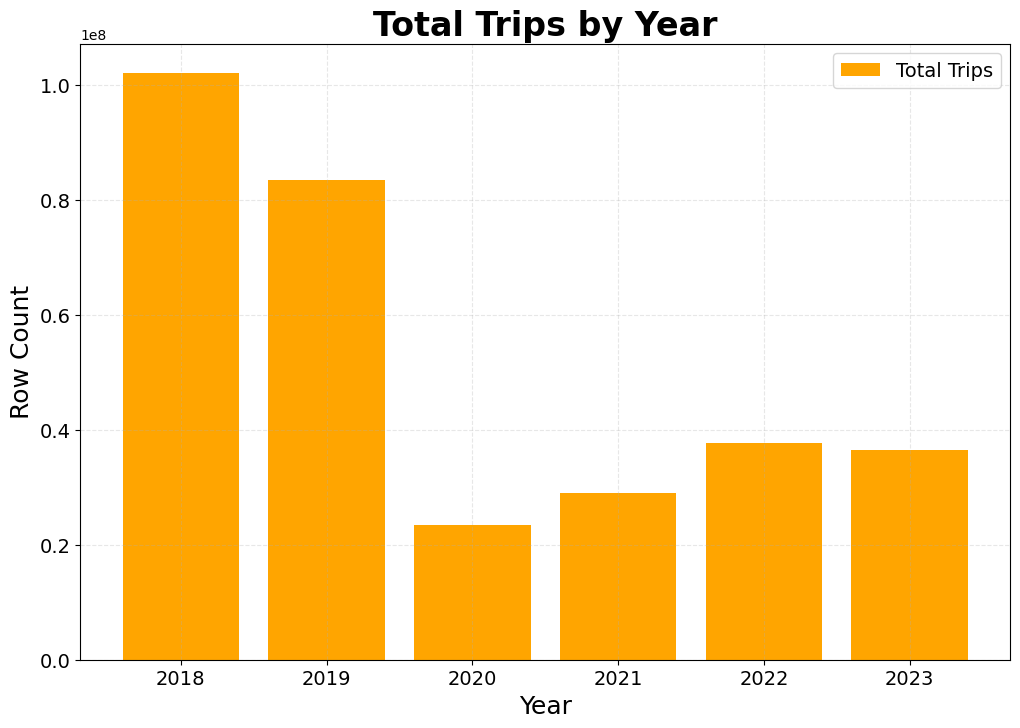

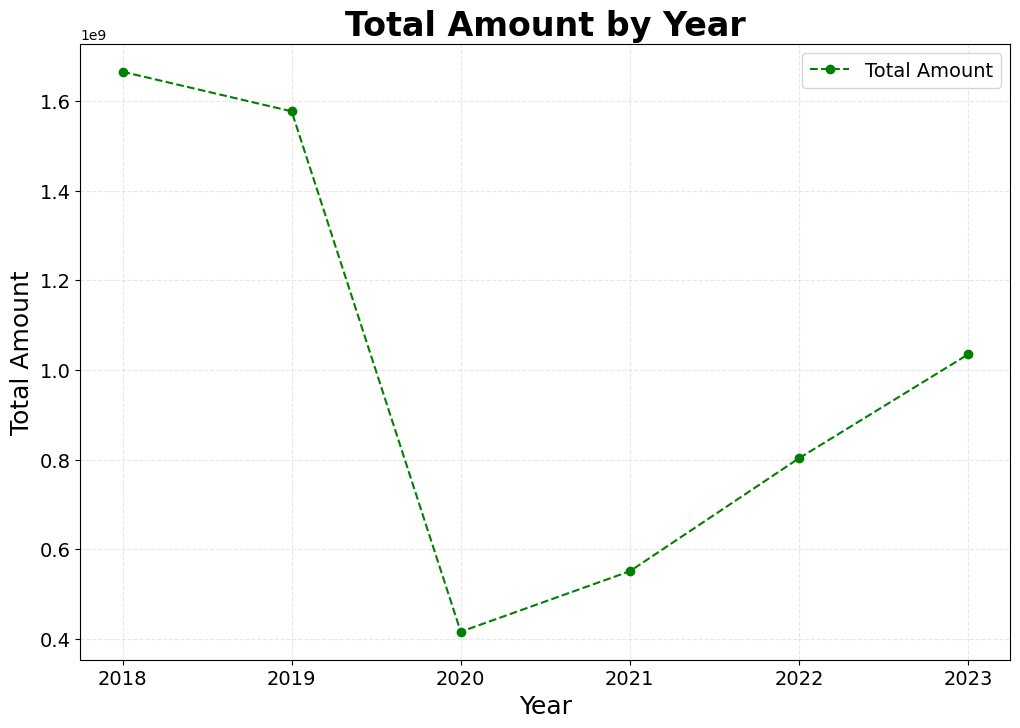

In [39]:
# 计算每年的平均小费
df_summary['Avg_Tip_Per_Trip'] = df_summary['Total_Tip_Amount'] / df_summary['Row_Count']

# 绘制每年的平均小费趋势
plt.figure(figsize=(12, 8))
plt.plot(df_summary['Year'], df_summary['Avg_Tip_Per_Trip'], marker='o', label='Avg Tip per Trip', color='blue')
plt.title('Average Tip Per Trip by Year', fontsize=24, fontweight='bold')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Average Tip', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=14)
plt.show()

# 绘制总单数变化趋势
plt.figure(figsize=(12, 8))
plt.bar(df_summary['Year'], df_summary['Row_Count'], color='orange', label='Total Trips')
plt.title('Total Trips by Year', fontsize=24, fontweight='bold')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Row Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=14)
plt.show()

# 绘制总金额变化趋势
plt.figure(figsize=(12, 8))
plt.plot(df_summary['Year'], df_summary['Total_Amount'], marker='o', linestyle='--', color='green', label='Total Amount')
plt.title('Total Amount by Year', fontsize=24, fontweight='bold')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total Amount', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=14)
plt.show()


In [97]:
df_summary

,Year,Total_Tip_Amount,Total_Amount,Row_Count,Avg_Tip_Per_Trip
0,2018,1.903293e+08,1.665214e+09,102103432,1.864083
1,2019,1.825209e+08,1.576843e+09,83407024,2.188315
2,2020,4.915571e+07,4.161850e+08,23519233,2.090022
3,2021,6.817428e+07,5.510754e+08,29035899,2.347931
4,2022,1.020003e+08,8.029075e+08,37778893,2.699927
5,2023,1.295062e+08,1.034567e+09,36511766,3.546971


In [14]:
# 将 pickup_counts18 转换为 DataFrame
pickup_counts19_df = pickup_counts19.reset_index()
pickup_counts19_df.columns = ['PULocationID', 'Count']  # 重命名列名

# 保存为 CSV 文件
pickup_counts19_df.to_csv('pickup_counts19.csv', index=False)

print("The file has been saved as 'pickup_counts19.csv'")


The file has been saved as 'pickup_counts19.csv'


In [13]:
pickup_counts19 = sum([eval(f"df19_{i}['PULocationID'].value_counts()") for i in range(1, 13)])